<!--TABLE OF CONTENTS-->
Contents:
- ["Haters gonna (make you) hate:  il Negative Campaign come predittore di hate speech online nelle elezioni europee del 2019 in Italia"](#"Haters-gonna-(make-you)-hate:--il-Negative-Campaign-come-predittore-di-hate-speech-online-nelle-elezioni-europee-del-2019-in-Italia")
- [(1) Pre-Processing](#(1)-Pre-Processing)
    - [(1.1) Import packages](#(1.1)-Import-packages)
    - [(1.2) Define functions](#(1.2)-Define-functions)
    - [(1.3) Import the data](#(1.3)-Import-the-data)
    - [(1.4) Create some new variables & subsets](#(1.4)-Create-some-new-variables-&-subsets)
- [(2) ANALYSIS](#(2)-ANALYSIS)
  - [(2.1)Type of campaign](#(2.1)Type-of-campaign)
  - [(2.2) Who used the negative campaign?](#(2.2)-Who-used-the-negative-campaign?)
    - [Opposition or the Government?](#Opposition-or-the-Government?)
    - [Left or Right parties?](#Left-or-Right-parties?)
    - [M5S is a left party](#M5S-is-a-left-party)
    - [Testing differences with chi-square: left or right VS opposition or governament?](#Testing-differences-with-chi-square:-left-or-right-VS-opposition-or-governament?)
    - [Most voted 4 parties](#Most-voted-4-parties)
  - [(2.3) Which social media generate more hate?](#(2.3)-Which-social-media-generate-more-hate?)

# "Haters gonna (make you) hate:  il Negative Campaign come predittore di hate speech online nelle elezioni europee del 2019 in Italia"

Author: Salvatore Romano 

Advisor: prof. Suitner,  Co-advisor: prof. Carraro 

Date: 2020  


# (1) Pre-Processing

### (1.1) Import packages

In [1]:
#Importing (and installing) packages

import pandas as pd #pip3 install pandas
import numpy as np
import matplotlib.pyplot as plt #pip3 install matplotlib
import re
import numpy as np
from sklearn.linear_model import LinearRegression  #pip3 install sklearn
import statsmodels   #pip3 install statsmodels
import statsmodels.api as sm
from scipy import stats
from IPython.core.display import HTML
import statsmodels.formula.api as smf
def short_summary(est):
    return HTML(est.summary().tables[1].as_html())
import researchpy as rp  #pip3 install researchpy
from scipy.stats import f_oneway
import scipy.stats as stats
import nbimporter #pip3 install nbimporter


#import this

### (1.2) Define functions

In [2]:
%run functions.ipynb

### (1.3) Import the data

In [3]:
#Import the DB
com = pd.read_csv(r"db/com_liwc.csv", sep='\t', engine='python')
#print (com)

In [4]:
#Check the DB
print('Number of colums in Dataframe : ', len(com.columns))
print('Number of rows in Dataframe : ', len(com.index))

Number of colums in Dataframe :  243
Number of rows in Dataframe :  78175


In [5]:
# Create the df
comDB = pd.DataFrame(data=com)

pd.set_option('display.max_columns', None)
comDB

,Origin_file_order,Site,p_id,dateCreated,p_politician,p_gender,p_GRUPPO_PE,p_LISTA,p_PARTITO,p_governo,p_dx_sx,p_CIRCOSCRIZIONE,p_text,p_favoriteCount,p_shareCount,p_replyCount,p_replyEval,p_numComments,p_numFakeTags,p_rating,p_category,p_topic,p_campagna,p_camapagna2,Target1,Target2,p_targe1-2,target1_s-p,target1_pol,c_text,c_level,c_replyToUser,c_replyToText,c_rating,c_rating3,c_ratingCivile,c_ratingPosNeg,c_category,Unnamed: 38,c_topic,isPersonal,c_WC,c_WPS,c_Sixltr,c_Dic,c_pronomi,c_Io,c_Noi,c_Se,c_Tu,c_Altri,c_Negazio,c_Consen,c_Articol,c_Prepos,c_Numero,c_Affett,c_Sen_Pos,c_Emo_Pos,c_Ottimis,c_Emo_Neg,c_Ansia,c_Rabbia,c_Tristez,c_Mec_Cog,c_Causa,c_Intros,c_Discrep,c_Inibiz,c_possib,c_Certez,c_Proc_Sen,c_Vista,c_Udito,c_Sentim,c_Social,c_Comm,c_Rif_gen,c_amici,c_Famigl,c_Umano,c_Tempo,c_Passato,c_Present,c_Futuro,c_Spazio,c_Sopra,c_Sotto,c_Inclusi,c_Esclusi,c_Movimen,c_Occupaz,c_Scuola,c_Lavoro,c_Raggiun,c_Svago,c_Casa,c_Sport,c_TV_it,c_Musica,c_Soldi,c_Metafis,c_religio,c_Morte,c_Fisico,c_Corpo,c_Sesso,c_Mangiare,c_Dormire,c_Cura_cor,c_parolac,c_Non_flu,c_riempiti,c_Voi,c_Lui_lei,c_Loro,c_Condizio,c_Transiti,c_P_pass,c_gerundio,c_Passivo,c_Essere,c_Avere,c_Formale,c_Io_Ver,c_Tu_Verbo,c_Lui_Verb,c_Noi_Verb,c_Voi_Verb,c_Loro_Ver,c_AllPunc,c_Period,c_Comma,c_Colon,c_SemiC,c_Qmark,c_Exclam,c_Dash,c_Quote,c_Apostro,c_Parenth,c_OtherP,p_WC,p_WPS,p_Sixltr,p_Dic,p_pronomi,p_Io,p_Noi,p_Se,p_Tu,p_Altri,p_Negazio,p_Consen,p_Articol,p_Prepos,p_Numero,p_Affett,p_Sen_Pos,p_Emo_Pos,p_Ottimis,p_Emo_Neg,p_Ansia,p_Rabbia,p_Tristez,p_Mec_Cog,p_Causa,Ip_ntros,p_Discrep,Ip_nibiz,p_possib,p_Certez,p_Proc_Sen,p_Vista,p_Udito,p_Sentim,p_Social,p_Comm,p_Rif_gen,p_amici,p_Famigl,p_Umano,p_Tempo,p_Passato,p_Present,p_Futuro,p_Spazio,p_Sopra,p_Sotto,Ip_nclusi,p_Esclusi,p_Movimen,p_Occupaz,p_Scuola,p_Lavoro,p_Raggiun,p_Svago,p_Casa,p_Sport,p_TV_it,p_Musica,p_Soldi,p_Metafis,p_religio,p_Morte,p_Fisico,p_Corpo,p_Sesso,p_Mangiare,p_Dormire,p_Cura_cor,p_parolac,p_Non_flu,p_riempiti,p_Voi,p_Lui_lei,p_Loro,p_Condizio,p_Transiti,p_P_pass,p_gerundio,p_Passivo,p_Essere,p_Avere,p_Formale,p_Io_Ver,p_Tu_Verbo,p_Lui_Verb,p_Noi_Verb,p_Voi_Verb,p_Loro_Ver,p_AllPunc,p_Period,p_Comma,p_Colon,p_SemiC,p_Qmark,p_Exclam,p_Dash,p_Quote,p_Apostro,p_Parenth,p_OtherP
0,30126,FB,96844400700_10157493758850701,2019-04-23T10:33:37Z,MARCELLO GEMMATO,M,PPE,FDI,FDI,opposizione,destra,s,Se i musulmani pensano di portare la guerra sa...,270,80,57,33,1729,0,problematico,Rifugiati Musulmani,religioni europa,Comparativa,Neg-comp,Categoria di persone,NaN,Categoria di persone,gruppo,non politico,C'è poco da dire questa è gente che la guerra ...,1,FRATELLIDITALIA.PUGLIA,Se i musulmani pensano di portare la guerra sa...,problematico,probl-hate,incivile,negativo,Rifugiati Musulmani,NaN,Other,Other,4,2.0,50.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,0.00,0.00,0,0.00,0.0,0.00,0.00,0.0,0.0,125.00,100.00,0.00,0.0,0.0,0.00,25.00,0.0,0.0,0.00,0.0,0.00,6,6.00,33.33,33.33,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,33.33,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0,0.00,0.00,0,0.00,0.0,0.00,0.0,0.0,0.0,16.67,16.67,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
1,30226,FB,96844400700_10157493758850701,2019-04-23T10:33:37Z,MARCELLO GEMMATO,M,PPE,FDI,FDI,opposizione,destra,s,Se i musulmani pensano di portare la guerra sa...,270,80,57,33,1729,0,problematico,Rifugiati Musulmani,religioni europa,Comparativa,Neg-comp,Categoria di persone,NaN,Categoria di persone,gruppo,non p

### (1.4) Create some new variables & subsets

Renaming some values

In [6]:
#Rename the variables to traslate them in english
comDB = comDB.replace({'Positiva':'Positive', 'Negativa': 'Negative', 'Comparativa': 'Comparative', 'Neutro':'Neutral'}) 
comDB = comDB.replace({'opposizione':'Opposition', 'governo':'Government'}) 
comDB = comDB.replace({'destra':'Right parties', 'sinistra':'Left parties'})
comDB = comDB.replace({'ambiguo':'Ambiguos', 'negativo': 'Negative', 'problematico': 'Problematic', 'hate':'Hate Speech', 'positivo':'Positive'}) 


hide_toggle()

Creating some control variables

In [7]:
# Create a control variable
comDB['Count']=1

# Create a new reduced variable
a = comDB.p_campagna.value_counts()
#print (a)
vals = a[:3].index
#print (vals)
comDB['p_campagna3']= comDB.p_campagna.where(comDB.p_campagna.isin(vals), 'Positive')

hide_toggle()

Some checks on the c_level 

In [8]:
#Count the hate in the comments > c_level==2

a = comDB.groupby('c_level').count()
a = a.Count

d = comDB.loc[comDB['Site'] == 'FB']
d = d.groupby('c_level').count()
d = d.Count

b = comDB.loc[comDB['c_rating'] == 'Hate Speech']
b = b.groupby('c_level').count()
b = b.Count

'''
print (a)
print ('Only on fb')
print (d)
print ('Only hate')
print (b)
'''

hide_toggle()


Creating some subsets

In [9]:
#Creating subsets of data


# 1) postDB

# df with just the single posts made by politicians
postDB = comDB.drop_duplicates('p_text')

#removing neutral campaign 
postDB3 = postDB[postDB.p_campagna != 'Neutral']

#removing m5s party 
postDBnom5s = postDB3[postDB3.p_PARTITO != 'M5S']



# 2) comDB

#removing neutral campaign from comDB
comDB3 = comDB[comDB.p_campagna != 'Neutral']

#removing Ambiguos comments from comDB
comDB3 = comDB3[comDB3.c_rating != 'Ambiguos']

#save a db with all the levels for future checks
#comDB3l = comDB3

#removing unneeded levels of anse comments from comDB
comDB3 = comDB3[comDB3.c_level != 3]

#removing unneeded levels of ansewer from comDB
comDB3 = comDB3[comDB3.c_level != 4]



# 3) targetDB
targetDB = comDB3[comDB3.p_campagna != 'Positive']



# 4) other small subsets 

# df with just the hate speech comments
comHS = comDB.loc[comDB['c_rating'] == 'problematico']

# df with all the comments answering to negative and comparative campaigns
negcomDB = comDB.loc[comDB['p_campagna']== 'Negative']
compcomDB = comDB.loc[comDB['p_campagna']== 'Comparative']
negcompcomDB = pd.concat([compcomDB,negcomDB])

# df with all the posts with negative and comparative campaigns
negpostDB = postDB.loc[postDB['p_campagna']== 'Negative']
comppostDB = postDB.loc[postDB['p_campagna']== 'Comparative']
negcomppostDB = pd.concat([comppostDB,negpostDB])

# print the new variables:
#comHS.head()
#postDB
#negcompcomDB.head()
#negcomppostDB.head()

#Check the DB
#print('Number of colums in Dataframe : ', len(postDB3.columns))
#print('Number of rows in Dataframe : ', len(postDB3.index))
#print('Number of colums in Dataframe : ', len(postDBnom5s.columns))
#print('Number of rows in Dataframe : ', len(postDBnom5s.index))

hide_toggle()


Creating new variables (left-right)

In [10]:
# Create a new variable where m5s is a left party
sxm5s = []
for row in postDB['p_PARTITO']:
    if row == 'PD' :    sxm5s.append('Left parties')
    elif row == 'M5S':  sxm5s.append('Left parties')
    elif row == 'FDI':  sxm5s.append('Right parties')
    elif row == 'Lega':  sxm5s.append('Right parties')
    elif row == 'FI':  sxm5s.append('Right parties')
    elif row == '+ Europa' :  sxm5s.append('Left parties')
    elif row == 'Possibile' :  sxm5s.append('Left parties')
    elif row == 'La Sinistra' :  sxm5s.append('Left parties')
    elif row == 'NaN' :  sxm5s.append('altro')
    else: sxm5s.append('altro')
# Create a column from the list
postDB['p_dx_sxm5s'] = sxm5s


sxm5s = []
for row in postDB3['p_PARTITO']:
    if row == 'PD' :    sxm5s.append('Left parties')
    elif row == 'M5S':  sxm5s.append('Left parties')
    elif row == 'FDI':  sxm5s.append('Right parties')
    elif row == 'Lega':  sxm5s.append('Right parties')
    elif row == 'FI':  sxm5s.append('Right parties')
    elif row == '+ Europa' :  sxm5s.append('Left parties')
    elif row == 'Possibile' :  sxm5s.append('Left parties')
    elif row == 'La Sinistra' :  sxm5s.append('Left parties')
    elif row == 'NaN' :  sxm5s.append('altro')
    else: sxm5s.append('altro')

postDB3['p_dx_sxm5s'] = sxm5s

hide_toggle()

<ipython-input-10-7718d56ab253>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  postDB['p_dx_sxm5s'] = sxm5s
<ipython-input-10-7718d56ab253>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  postDB3['p_dx_sxm5s'] = sxm5s


Create new db for campaign target analysis

In [11]:
# grouping into dichotomous varibles to understand what generate more hate

singplur = []

for row in targetDB['p_targe1-2']:
    if row   == 'Personaggio politico' :  singplur.append('singolare')
    elif row == 'Personaggio pubblico':  singplur.append('singolare')
    elif row == 'Personaggio pubblico Personaggio politico':  singplur.append('singolare')
    elif row == 'Privato cittadino':  singplur.append('singolare')
    elif row == 'Privato cittadino Personaggio pubblico':  singplur.append('singolare')
    elif row == 'Privato cittadino Personaggio politico' :  singplur.append('singolare')
    elif row == 'Categoria di persone':  singplur.append('plurale')
    elif row == 'Categoria di persone Gruppo non politico' :  singplur.append('plurale')
    elif row == 'Categoria di persone Gruppo politico':  singplur.append('plurale')
    elif row == 'Gruppo non politico':  singplur.append('plurale')
    elif row == 'Gruppo non politico Gruppo politico ':  singplur.append('plurale')
    elif row == 'Gruppo politico' :  singplur.append('plurale')
    else:           singplur.append('Nan')

# Create a column from the list
targetDB['singplur'] = singplur
# View the new dataframe
#print(targetDB.groupby('singplur')['singplur'].count())

pubnonpub = []

for row in targetDB['p_targe1-2']:
    if row   == 'Personaggio politico' :  pubnonpub.append('pubblico_politico')
    elif row == 'Personaggio pubblico':  pubnonpub.append('pubblico_politico')
    elif row == 'Personaggio pubblico Personaggio politico':  pubnonpub.append('pubblico_politico')
    elif row == 'Personaggio politico Gruppo politico ':  pubnonpub.append('pubblico_politico')
    elif row == 'Personaggio pubblico Gruppo politico':  pubnonpub.append('pubblico_politico')
    elif row == 'Personaggio politico Gruppo non politico':  pubnonpub.append('pubblico_politico')
    elif row == 'Personaggio pubblico Gruppo non politico':  pubnonpub.append('pubblico_politico')
    elif row == 'Gruppo non politico':  pubnonpub.append('pubblico_politico')
    elif row == 'Gruppo politico':  pubnonpub.append('pubblico_politico')
    elif row == 'Gruppo non politico Gruppo politico':  pubnonpub.append('pubblico_politico')
    elif row == 'Privato cittadino' :  pubnonpub.append('privato')
    elif row == 'Categoria di persone':  pubnonpub.append('privato')
    elif row == 'Privato cittadino Categoria di persone' :  pubnonpub.append('privato')
    else:           pubnonpub.append('Nan')

# Create a column from the list
targetDB['pubnonpub'] = pubnonpub
# View the new dataframe
#print(targetDB3.groupby('pubnonpub')['pubnonpub'].count())

# targetDBn: without Nan
targetDBn = targetDB[targetDB.pubnonpub != 'Nan']
targetDBn = targetDBn[targetDBn.singplur != 'Nan']

hide_toggle()

<ipython-input-11-5c75d3263e00>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targetDB['singplur'] = singplur
<ipython-input-11-5c75d3263e00>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targetDB['pubnonpub'] = pubnonpub


# (2) ANALYSIS

## (2.1)What is the most used type of campaign?

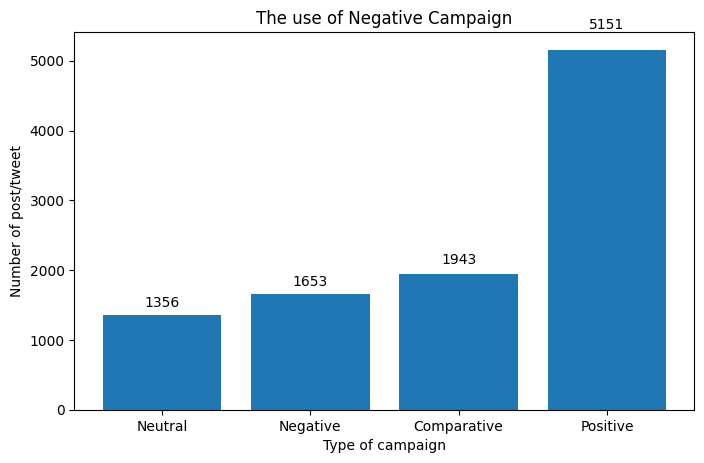

In [41]:
# BAR-CHART: Type of campaign

# variables
a = postDB.groupby('p_campagna').count()
a = a.sort_values('Count')
a = a.Count

# Graphs info   
plt.figure(figsize=(8,5), dpi=100)
plt.title('The use of Negative Campaign')
plt.xlabel ('Type of campaign')
plt.ylabel ('Number of post/tweet')
width = 0.35

rects = plt.bar(a.index, height=a)

autolabel_bar1(rects)

#plt.savefig('images/tipoDiCampagna.png', dpi=350)

plt.show()

hide_toggle()

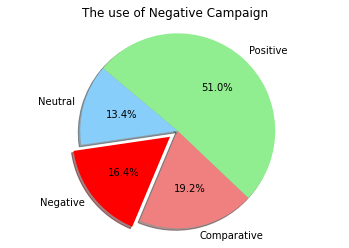

In [42]:
# PIE-CHART: type of campaign
a = postDB.groupby('p_campagna').count().sort_values('Count')
a = a.Count

# labels
labels = a.index
sizes = a
colors = ['lightskyblue', 'red', 'lightcoral', 'lightgreen']
explode = (0.0, 0.1, 0.0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('The use of Negative Campaign')

#plt.savefig('images/tipoDiCampagnapie.png', dpi=350)

plt.show()

hide_toggle()

## (2.2) Who used the negative campaign?
The strength of the relationship is between "moderate" and "strong". (Akoglu,2018)

### Opposition or the Government?

Campaign type will be reduced in 3
['Positive', 'Comparative', 'Negative']
['p_campagna3']


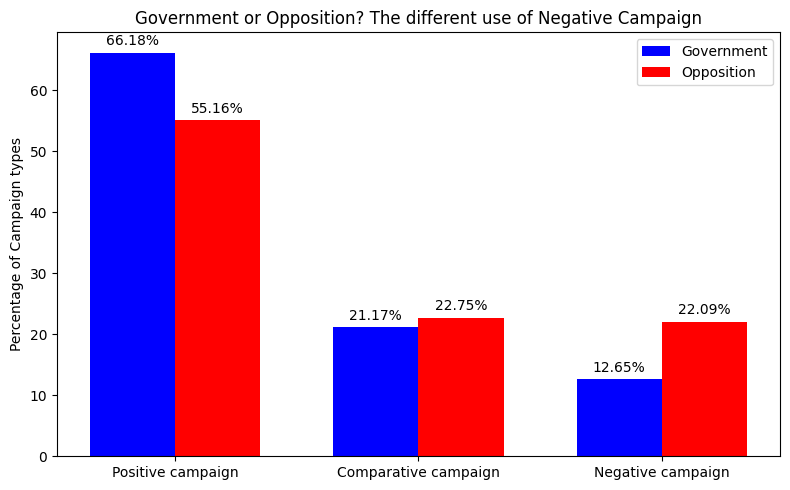

Campaign type will be reduced in3
['Positive', 'Comparative', 'Negative']
p_campagna3
                Chi-square test   results
0  Pearson Chi-square ( 2.0) =   134.8738
1                    p-value =     0.0000
2                 Cramer's V =     0.1242


In [24]:
# The use of negative campaign: Opposition or the Government?

changeReduction()


# create the new DB
a = postDB3.loc[postDB3['p_governo'] == 'Government']
a = a.groupby(p_campagnaVar).count().reindex(newindex)
a = a.Count.transform(lambda x: x/x.sum()*100)

b = postDB3.loc[postDB3['p_governo'] == 'Opposition']
b = b.groupby(p_campagnaVar).count().reindex(newindex)
b = b.Count.transform(lambda x: x/x.sum()*100)

# create a figure
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
labels = b.index

# add legend
x = np.arange(len(labels)) 
width = 0.35  # the width of the bars
rects1 = ax.bar(x - width/2, a, width, label='Government', color='b',)
rects2 = ax.bar(x + width/2, b, width, label='Opposition', color='r', )

autolabel_barPC(rects1)
autolabel_barPC(rects2)

# add labels
ax.set_ylabel('Percentage of Campaign types')
ax.set_title('Government or Opposition? The different use of Negative Campaign')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xticklabels(['Positive campaign', 'Comparative campaign','Negative campaign'])
ax.legend()

# plot
fig.tight_layout()
#plt.savefig('images/governo.png', dpi=300)
plt.show()

changeReduction2()

crosstab1, test_results1, expected = rp.crosstab(postDB3[p_campagnaVar], postDB3["p_governo"],
                                               prop= 'col', 
                                               test= "chi-square",
                                               #‘row’, ‘col’, or ‘cell’.
                                               expected_freqs= True,
                                               #cramer_correction = True,
                                               #prop= "cell"
                                                )

#print(crosstab1)
#print('---------------------------------------------------')
print(test_results1)

hide_toggle()

### Left or Right parties?
The strength of the relationship is "weak". (Akoglu,2018)

### M5S is a right party
Weak Cramer (0.4)

Campaign type will be reduced in 3
['Positive', 'Comparative', 'Negative']
['p_campagna3']


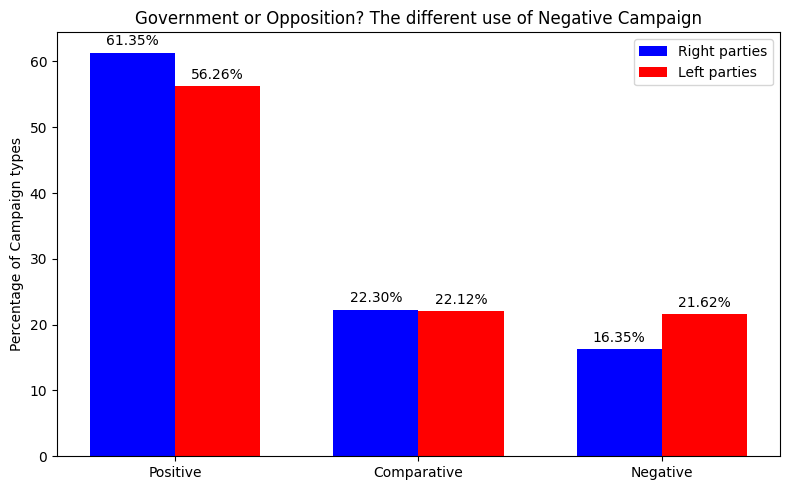

Campaign type will be reduced in 3
['Positive', 'Comparative', 'Negative']
['p_campagna3']
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =   15.6995
1                    p-value =    0.0001
2               Cramer's phi =    0.0394


In [44]:
# The use of negative campaign: Opposition or the Government?

changeReduction()


# create the new DB
a = postDB3.loc[postDB3['p_dx_sx'] == 'Right parties']
a = a.groupby(p_campagnaVar).count().reindex(newindex)
a = a.Count.transform(lambda x: x/x.sum()*100)

b= postDB3.loc[postDB3['p_dx_sx'] == 'Left parties']
b = b.groupby(p_campagnaVar).count().reindex(newindex)
b = b.Count.transform(lambda x: x/x.sum()*100)

# create a figure
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
labels = b.index

# add legend
x = np.arange(len(labels)) 
width = 0.35  # the width of the bars
rects1 = ax.bar(x - width/2, a, width, label='Right parties', color='b',)
rects2 = ax.bar(x + width/2, b, width, label='Left parties', color='r', )

autolabel_barPC(rects1)
autolabel_barPC(rects2)

# add labels
ax.set_ylabel('Percentage of Campaign types')
ax.set_title('Government or Opposition? The different use of Negative Campaign')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# plot
fig.tight_layout()
#plt.savefig('images/governo.png', dpi=300)
plt.show()

changeReduction()

crosstab, test_results, expected = rp.crosstab(postDB["p_camapagna2"], postDB["p_dx_sx"],
                                               prop= 'col', 
                                               test= "chi-square",
                                               expected_freqs= True,
                                               )
#print (crosstab)
#print('---------------------------------------------------')
#print (expected)
#print('---------------------------------------------------')
print(test_results)


hide_toggle()

### M5S is a left party
Still weak Cramer (0.05)

Campaign type will be reduced in 3
['Positive', 'Comparative', 'Negative']
['p_campagna3']


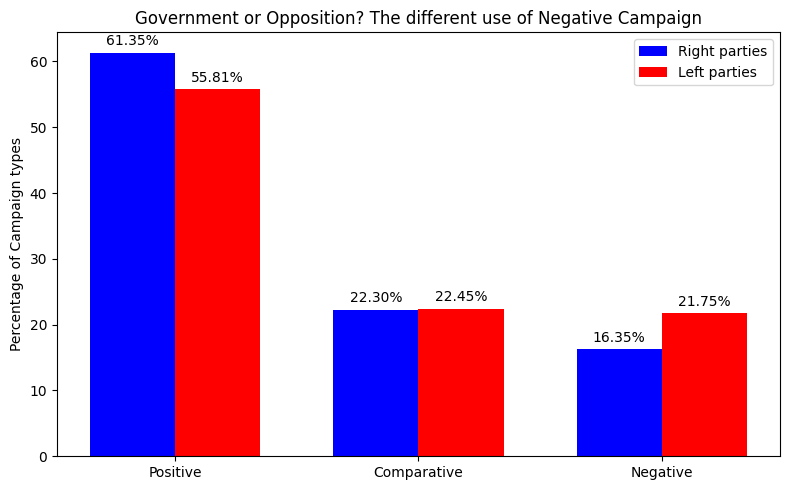

Campaign type will be reduced in 3
['Positive', 'Comparative', 'Negative']
['p_campagna3']
                Chi-square test  results
0  Pearson Chi-square ( 2.0) =   29.8345
1                    p-value =    0.0000
2                 Cramer's V =    0.0584


In [45]:
# The use of negative campaign: Opposition or the Government?

changeReduction()

# create the new DB
a = postDB3.loc[postDB3['p_dx_sxm5s'] == 'Right parties']
a = a.groupby(p_campagnaVar).count().reindex(newindex)
a = a.Count.transform(lambda x: x/x.sum()*100)

b= postDB3.loc[postDB3['p_dx_sxm5s'] == 'Left parties']
b = b.groupby(p_campagnaVar).count().reindex(newindex)
b = b.Count.transform(lambda x: x/x.sum()*100)

# create a figure
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
labels = b.index

# add legend
x = np.arange(len(labels)) 
width = 0.35  # the width of the bars
rects1 = ax.bar(x - width/2, a, width, label='Right parties', color='b',)
rects2 = ax.bar(x + width/2, b, width, label='Left parties', color='r', )

autolabel_barPC(rects1)
autolabel_barPC(rects2)

# add labels
ax.set_ylabel('Percentage of Campaign types')
ax.set_title('Government or Opposition? The different use of Negative Campaign')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# plot
fig.tight_layout()
#plt.savefig('images/governo.png', dpi=300)
plt.show()

changeReduction()

crosstab, test_results, expected = rp.crosstab(postDB3["p_camapagna2"], postDB3["p_dx_sxm5s"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
#print (crosstab)
#print('---------------------------------------------------')
print (test_results)


hide_toggle()

### Without m5s
moderate Cramer (0.1), but still less than governament vs opposition.
left seems to be using more negative campaign, not in accordance with the letterature.

Campaign type will be reduced in 3
['Positive', 'Comparative', 'Negative']
['p_campagna3']


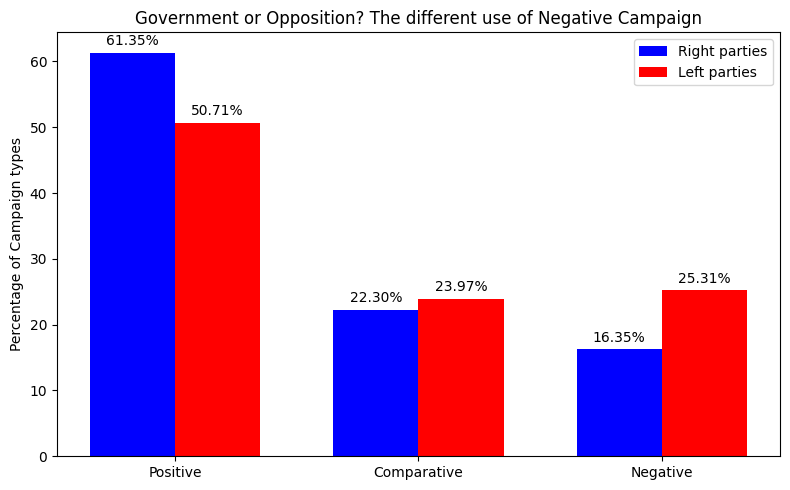

Campaign type will be reduced in 3
['Positive', 'Comparative', 'Negative']
['p_campagna3']
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =   88.8855
1                    p-value =    0.0000
2               Cramer's phi =    0.1062


In [46]:
# The use of negative campaign: Opposition or the Government?

changeReduction()


# create the new DB
a = postDBnom5s.loc[postDBnom5s['p_dx_sx'] == 'Right parties']
a = a.groupby(p_campagnaVar).count().reindex(newindex)
a = a.Count.transform(lambda x: x/x.sum()*100)

b= postDBnom5s.loc[postDBnom5s['p_dx_sx'] == 'Left parties']
b = b.groupby(p_campagnaVar).count().reindex(newindex)
b = b.Count.transform(lambda x: x/x.sum()*100)

# create a figure
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
labels = b.index

# add legend
x = np.arange(len(labels)) 
width = 0.35  # the width of the bars
rects1 = ax.bar(x - width/2, a, width, label='Right parties', color='b',)
rects2 = ax.bar(x + width/2, b, width, label='Left parties', color='r', )

autolabel_barPC(rects1)
autolabel_barPC(rects2)

# add labels
ax.set_ylabel('Percentage of Campaign types')
ax.set_title('Government or Opposition? The different use of Negative Campaign')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# plot
fig.tight_layout()
#plt.savefig('images/governo.png', dpi=300)
plt.show()

changeReduction()

crosstab, test_results, expected = rp.crosstab(postDBnom5s["p_camapagna2"], postDBnom5s["p_dx_sx"],
                                               prop= 'col', 
                                               test= "chi-square",
                                               expected_freqs= True,
                                               )
#print (crosstab)
#print('---------------------------------------------------')
#print (expected)
#print('---------------------------------------------------')
print(test_results)


hide_toggle()

## Most voted 4 parties
We see that governament parties have done more postivie campaing, and among the opposition parties, left parties (PD) have done more negative campaign.
Results are consistent watching main parties individually.

Campaign type will be reduced in 3
['Positive', 'Comparative', 'Negative']
['p_campagna3']


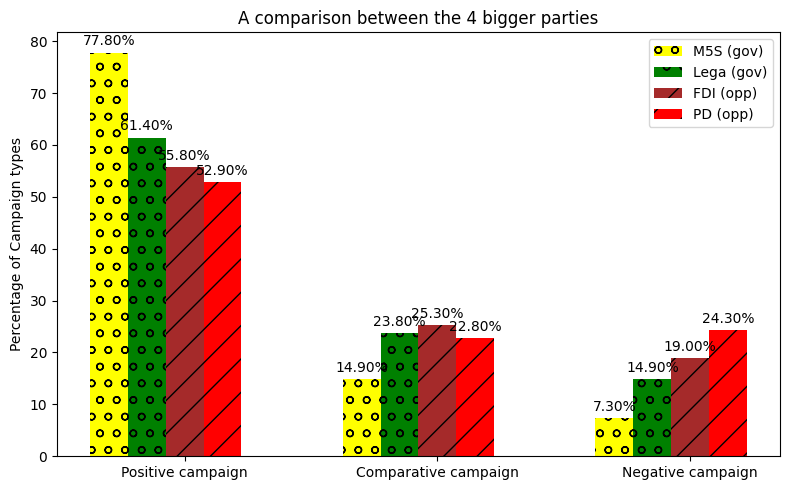

Campaign type will be reduced in3
['Positive', 'Comparative', 'Negative']
p_campagna3
                 Chi-square test   results
0  Pearson Chi-square ( 14.0) =   418.4431
1                     p-value =     0.0000
2                  Cramer's V =     0.1567


In [27]:
### The parities and thier use of political campaigns. Among the 4 parties who produced the biggest ammount of online political campaign (Lega, PD, M5S, FDI), 
# M5S and Lega (who were at the government during european elections) have done much more positive campaign than oters parties, and less negative one.
# Comparative post are almost equal among PD,Lega adn FDI, confirming again that this type of campaign is more or less equally used among parties and political sides.Just the M5S, who have done much more positive campaign than all the others, have less comparative campaign.

changeReduction()

# create the new DB
a = postDB3.loc[postDB3['p_PARTITO'] == 'M5S'].groupby(p_campagnaVar).count().reindex(newindex)
a = a.Count.transform(lambda x: x/x.sum()*100).round(1)

b= postDB3.loc[postDB3['p_PARTITO'] == 'Lega'].groupby(p_campagnaVar).count().reindex(newindex)
b = b.Count.transform(lambda x: x/x.sum()*100).round(1)

c= postDB3.loc[postDB3['p_PARTITO'] == 'FDI'].groupby(p_campagnaVar).count().reindex(newindex)
c = c.Count.transform(lambda x: x/x.sum()*100).round(1)

d= postDB3.loc[postDB3['p_PARTITO'] == 'PD'].groupby(p_campagnaVar).count().reindex(newindex)
d = d.Count.transform(lambda x: x/x.sum()*100).round(1)

# create a figure
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
labels = b.index

# add legend
x = np.arange(len(labels)) 
width = 0.15  # the width of the bars
rects1 = ax.bar(x - 2*width, a, width, label='M5S (gov)', color='yellow', hatch = 'o')
rects2 = ax.bar(x - width, b, width, label='Lega (gov)', color='green', hatch = 'o')
rects3 = ax.bar(x , c, width, label='FDI (opp)', color='brown', hatch = '/')
rects4 = ax.bar(x + width, d, width, label='PD (opp)', color='r', hatch = '/' )

autolabel_barPC(rects1), autolabel_barPC(rects2), autolabel_barPC(rects3), autolabel_barPC(rects4)

# add labels
ax.set_ylabel('Percentage of Campaign types')
ax.set_title('A comparison between the 4 bigger parties')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xticklabels(['Positive campaign', 'Comparative campaign','Negative campaign'])


ax.legend()

# plot
fig.tight_layout()
#plt.savefig('images/governo.png', dpi=300)
plt.show()


# test chisquare
changeReduction2()
crosstab, test_results, expected = rp.crosstab(postDB3 [p_campagnaVar], postDB3["p_PARTITO"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               correction=None,
                                               prop= "cell")
#plt.savefig('images/crosstab.png')
#print (crosstab)
print (test_results)

hide_toggle()

## (2.3) Which social media generate more negative campaign?

A comparisong between Facebook and Twitter: negative campaign is more used on Twitter, the comparative on Facebook.

Campaign type will be reduced in 3
['Positive', 'Comparative', 'Negative']
['p_campagna3']


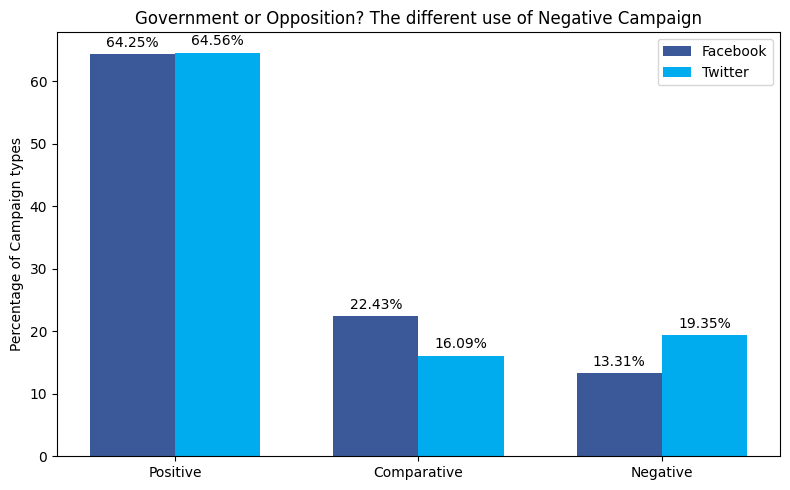

Campaign type will be reduced in 3
['Positive', 'Comparative', 'Negative']
['p_campagna3']
               p_dx_sxm5s                              
p_dx_sxm5s   Left parties Right parties   altro     All
p_camapagna2                                           
Neg-comp            38.14         33.75   27.62   35.59
Positive            61.86         66.25   72.38   64.41
All                100.00        100.00  100.00  100.00
---------------------------------------------------
                Chi-square test  results
0  Pearson Chi-square ( 2.0) =   28.6950
1                    p-value =    0.0000
2                 Cramer's V =    0.0533


In [50]:
changeReduction()

# create the new DB
a = postDB.loc[postDB['Site'] == 'FB']
a = a.groupby(p_campagnaVar).count().reindex(newindex)
a = a.Count.transform(lambda x: x/x.sum()*100)

b = postDB.loc[postDB['Site'] == 'Twitter']
b = b.groupby(p_campagnaVar).count().reindex(newindex)
b = b.Count.transform(lambda x: x/x.sum()*100)

# create a figure
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
labels = b.index

# add legend
x = np.arange(len(labels)) 
width = 0.35  # the width of the bars
rects1 = ax.bar(x - width/2, a, width, label='Facebook', color='#3b5998')
rects2 = ax.bar(x + width/2, b, width, label='Twitter', color='#00aced' )

autolabel_barPC(rects1)
autolabel_barPC(rects2)

# add labels
ax.set_ylabel('Percentage of Campaign types')
ax.set_title('Government or Opposition? The different use of Negative Campaign')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# plot
fig.tight_layout()
#plt.savefig('images/governo.png', dpi=300)
plt.show()

changeReduction()

crosstab, test_results, expected = rp.crosstab(postDB["p_camapagna2"], postDB["p_dx_sxm5s"],
                                               prop= 'col', 
                                               test= "chi-square",
                                               expected_freqs= True,
                                               )
print (crosstab)
#print('---------------------------------------------------')
#print (expected)
print('---------------------------------------------------')
print(test_results)

hide_toggle()


### 4 main parties, on each social network
The difference is constant across the main parties analyzed individually, always following what we found previusly: governament use more positive campaign, and opposition parties use more negative-comparative. Among them, left parties use more negative than right.

Campaign type will be reduced in 3
['Positive', 'Comparative', 'Negative']
['p_campagna3']


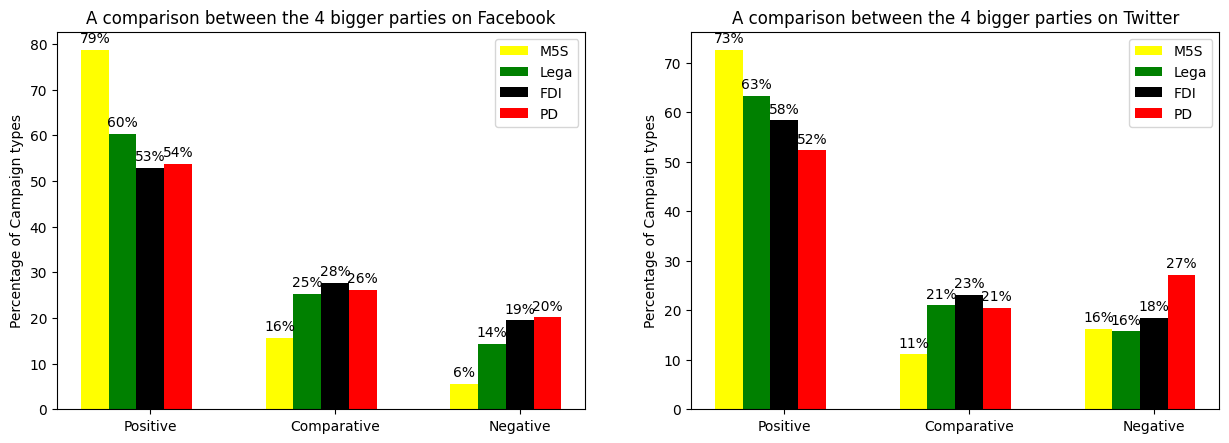

In [51]:
# 4 main parties across social media

changeReduction()

# variables for graph 1
a = postDB3.loc[(postDB3['p_PARTITO'] == 'M5S') & (postDB3['Site'] == 'FB')].groupby(p_campagnaVar).count().reindex(newindex)
a = a.Count.transform(lambda x: x/x.sum()*100)

b = postDB3.loc[(postDB3['p_PARTITO'] == 'Lega') & (postDB3['Site'] == 'FB')].groupby(p_campagnaVar).count().reindex(newindex)
b = b.Count.transform(lambda x: x/x.sum()*100)

c = postDB3.loc[(postDB3['p_PARTITO'] == 'FDI') & (postDB3['Site'] == 'FB')].groupby(p_campagnaVar).count().reindex(newindex)
c = c.Count.transform(lambda x: x/x.sum()*100)

d = postDB3.loc[(postDB3['p_PARTITO'] == 'PD') & (postDB3['Site'] == 'FB')].groupby(p_campagnaVar).count().reindex(newindex)
d = d.Count.transform(lambda x: x/x.sum()*100)


#  variables for graph 2
e = postDB3.loc[(postDB3['p_PARTITO'] == 'M5S') & (postDB3['Site'] == 'Twitter')].groupby(p_campagnaVar).count().reindex(newindex)
e = e.Count.transform(lambda x: x/x.sum()*100)

f = postDB3.loc[(postDB3['p_PARTITO'] == 'Lega') & (postDB3['Site'] == 'Twitter')].groupby(p_campagnaVar).count().reindex(newindex)
f = f.Count.transform(lambda x: x/x.sum()*100)

g = postDB3.loc[(postDB3['p_PARTITO'] == 'FDI') & (postDB3['Site'] == 'Twitter')].groupby(p_campagnaVar).count().reindex(newindex)
g = g.Count.transform(lambda x: x/x.sum()*100)

h = postDB3.loc[(postDB3['p_PARTITO'] == 'PD') & (postDB3['Site'] == 'Twitter')].groupby(p_campagnaVar).count().reindex(newindex)
h = h.Count.transform(lambda x: x/x.sum()*100)

# create a figure
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5), dpi=100)
width = 0.15  # the width of the bars

labels1 = a.index
x1 = np.arange(len(labels1)) 
labels2 = e.index
x2 = np.arange(len(labels2))

# add legend
rects1 = ax1.bar(x1 - 2*width, a, width, label='M5S', color='yellow')
rects2 = ax1.bar(x1 - width, b, width, label='Lega', color='green')
rects3 = ax1.bar(x1 , c, width, label='FDI', color='black')
rects4 = ax1.bar(x1 + width, d, width, label='PD', color='r')

rects5 = ax2.bar(x2 - 2*width, e, width, label='M5S', color='yellow')
rects6 = ax2.bar(x2 - width, f, width, label='Lega', color='green')
rects7 = ax2.bar(x2 , g, width, label='FDI', color='black')
rects8 = ax2.bar(x2 + width, h, width, label='PD', color='r')


autolabel_barPC1(rects1), autolabel_barPC1(rects2), autolabel_barPC1(rects3), autolabel_barPC1(rects4)
autolabel_barPC2(rects5), autolabel_barPC2(rects6), autolabel_barPC2(rects7), autolabel_barPC2(rects8)


# add labels graph 1
ax1.set_ylabel('Percentage of Campaign types')
ax1.set_title('A comparison between the 4 bigger parties on Facebook')
ax1.set_xticks(x1)
ax1.set_xticklabels(labels1)
ax1.legend()

# add labels graph 2
ax2.set_ylabel('Percentage of Campaign types')
ax2.set_title('A comparison between the 4 bigger parties on Twitter')
ax2.set_xticks(x2)
ax2.set_xticklabels(labels2)
ax2.legend()

# plot
#fig.tight_layout()
#plt.savefig('images/governo.png', dpi=300)
plt.show()


# test chisquare
#changeReduction2()
#crosstab, test_results, expected = rp.crosstab(postDB [p_campagnaVar], postDB["p_PARTITO"],
#                                               test= "chi-square",
#                                               expected_freqs= True,
#                                               correction=None,
#                                               prop= "cell")
#plt.savefig('images/crosstab.png')
#print (crosstab)
#print('---------------------------------------------------')
#print (expected)
#print('---------------------------------------------------')
#print(test_results)

hide_toggle()

### aggiungere il test sulla lunghezza del testo se serve

## (2.4) Is negative campaign more viral?

3 virality measures (# plus a fourth one)

Campaign type will be reduced in 3
['Positive', 'Comparative', 'Negative']
['p_campagna3']


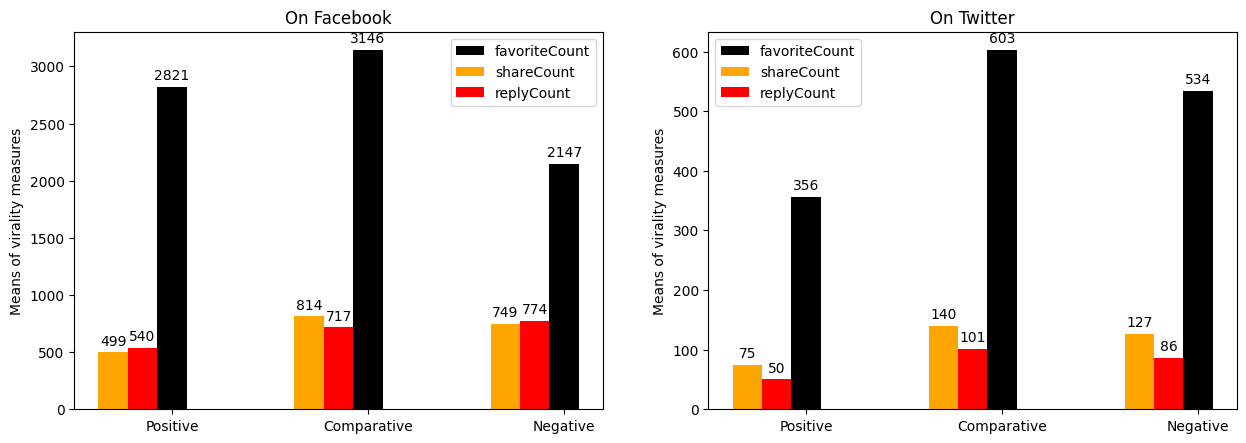

In [52]:
changeReduction()

# Varibales graph 1
a = postDB3.loc[postDB3['Site'] == 'FB'].groupby(p_campagnaVar)
a = a['p_favoriteCount'].mean().round(0).reindex(newindex)

b = postDB3.loc[postDB3['Site'] == 'FB'].groupby(p_campagnaVar)
b = b['p_shareCount'].mean().round(0).reindex(newindex)

c = postDB3.loc[postDB3['Site'] == 'FB'].groupby(p_campagnaVar)
c = c['p_replyCount'].mean().round(0).reindex(newindex)
#d = postDB3.loc[postDB3['Site'] == 'FB'].groupby(p_campagnaVar)
#d = d['p_numComments'].mean().round(0)


# Varibales graph 2
e = postDB3.loc[postDB3['Site'] == 'Twitter'].groupby(p_campagnaVar)
e = e['p_favoriteCount'].mean().round(0).reindex(newindex)

f = postDB3.loc[postDB3['Site'] == 'Twitter'].groupby(p_campagnaVar)
f = f['p_shareCount'].mean().round(0).reindex(newindex)

g = postDB3.loc[postDB3['Site'] == 'Twitter'].groupby(p_campagnaVar)
g = g['p_replyCount'].mean().round(0).reindex(newindex)
#h = postDB3.loc[postDB3['Site'] == 'Twitter'].groupby(p_campagnaVar)
#h = h['p_numComments'].mean().round(0)


# create a figure
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5), dpi=100)
width = 0.15  # the width of the bars

labels1 = a.index
x1 = np.arange(len(labels1)) 
labels2 = e.index
x2 = np.arange(len(labels2))

# add legend
rects1 = ax1.bar(x1 , a, width, label='favoriteCount', color='black')
rects2 = ax1.bar(x1 - 2*width, b, width, label='shareCount', color='orange')
rects3 = ax1.bar(x1 - width, c, width, label='replyCount', color='red')
#rects4 = ax1.bar(x  + 2*width, d, width, label='numComments', color='red', error_kw=dict(elinewidth=6, ecolor='yellow'))

rects5 = ax2.bar(x2 , e, width, label='favoriteCount', color='black')
rects6 = ax2.bar(x2 - 2*width, f, width, label='shareCount', color='orange')
rects7 = ax2.bar(x2 - width, g, width, label='replyCount', color='red')
#rects8 = ax2.bar(x  + 2*width, h, width, label='numComments', color='red', error_kw=dict(elinewidth=6, ecolor='yellow'))


autolabel_bar_1(rects1), autolabel_bar_1(rects2), autolabel_bar_1(rects3) 
#, autolabel_barPC1(rects4)
autolabel_bar_2(rects5), autolabel_bar_2(rects6), autolabel_bar_2(rects7) 
#, autolabel_barPC2(rects8)


# add labels graph 1
ax1.set_ylabel('Means of virality measures')
ax1.set_title('On Facebook')
ax1.set_xticks(x1)
ax1.set_xticklabels(labels1)
ax1.legend()

# add labels graph 2
ax2.set_ylabel('Means of virality measures')
ax2.set_title('On Twitter')
ax2.set_xticks(x2)
ax2.set_xticklabels(labels2)
ax2.legend()

# plot
#fig.tight_layout()
#plt.savefig('images/3viralitymeasures.png', dpi=300)
plt.show()

hide_toggle()


Positive campaign is less shared accross two social media --> maybe those graphs can be reduced to one

Campaign type will be reduced in 3
['Positive', 'Comparative', 'Negative']
['p_campagna3']


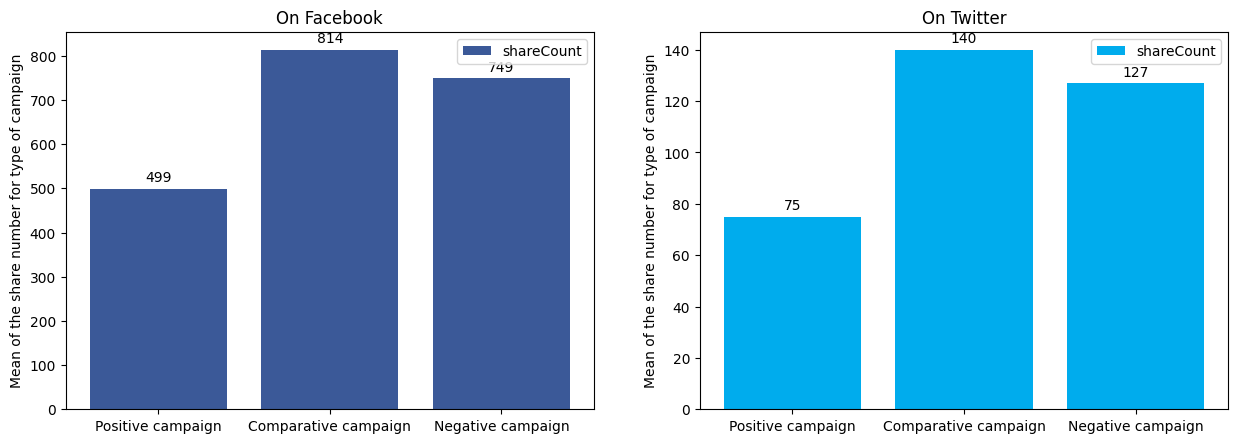

In [14]:
changeReduction()

# Varibales graph 1
b = postDB3.loc[postDB3['Site'] == 'FB']
b = b.groupby(p_campagnaVar)
b = b['p_shareCount'].mean().round(0).reindex(newindex)


# Varibales graph 2
f = postDB3.loc[postDB3['Site'] == 'Twitter']
f = f.groupby(p_campagnaVar)
f = f['p_shareCount'].mean().round(0).reindex(newindex)

# create a figure
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5), dpi=100)
width = 0.15  # the width of the bars

labels1 = b.index
x1 = np.arange(len(labels1)) 
labels2 = f.index
x2 = np.arange(len(labels2))

# add legend
rects2 = ax1.bar(x1, b, label='shareCount', color='#3b5998')
rects6 = ax2.bar(x2, f, label='shareCount', color='#00aced' )


autolabel_bar_1(rects2), autolabel_bar_2(rects6)

# add labels graph 1
ax1.set_ylabel('Mean of the share number for type of campaign')
ax1.set_title('On Facebook')
ax1.set_xticks(x1)
ax1.set_xticklabels(labels1)
ax1.set_xticklabels(['Positive campaign', 'Comparative campaign','Negative campaign'])
ax1.legend()

# add labels graph 2
ax2.set_ylabel('Mean of the share number for type of campaign')
ax2.set_title('On Twitter')
ax2.set_xticks(x2)
ax2.set_xticklabels(labels2)
ax2.set_xticklabels(['Positive campaign', 'Comparative campaign','Negative campaign'])
ax2.legend()

# plot
#fig.tight_layout()
#plt.savefig('images/3viralitymeasures.png', dpi=300)
plt.show()

hide_toggle()


Campaign type will be reduced in 3
['Positive', 'Comparative', 'Negative']
['p_campagna3']


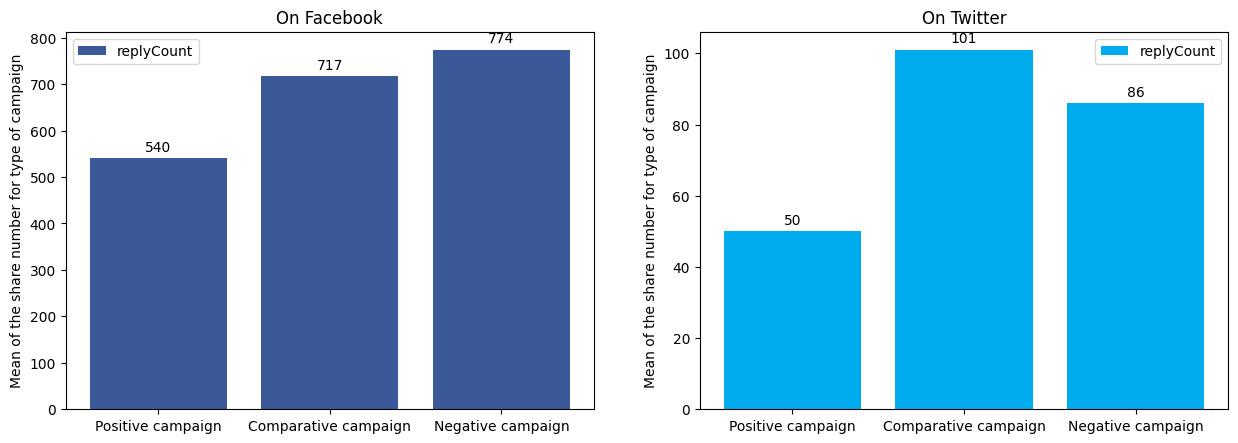

In [15]:
changeReduction()

# Varibales graph 1
b = postDB3.loc[postDB3['Site'] == 'FB']
b = b.groupby(p_campagnaVar)
b = b['p_replyCount'].mean().round(0).reindex(newindex)


# Varibales graph 2
f = postDB3.loc[postDB3['Site'] == 'Twitter']
f = f.groupby(p_campagnaVar)
f = f['p_replyCount'].mean().round(0).reindex(newindex)

# create a figure
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5), dpi=100)
width = 0.15  # the width of the bars

labels1 = b.index
x1 = np.arange(len(labels1)) 
labels2 = f.index
x2 = np.arange(len(labels2))

# add legend
rects2 = ax1.bar(x1, b, label='replyCount', color='#3b5998')
rects6 = ax2.bar(x2, f, label='replyCount', color='#00aced' )


autolabel_bar_1(rects2), autolabel_bar_2(rects6)

# add labels graph 1
ax1.set_ylabel('Mean of the share number for type of campaign')
ax1.set_title('On Facebook')
ax1.set_xticks(x1)
ax1.set_xticklabels(labels1)
ax1.set_xticklabels(['Positive campaign', 'Comparative campaign','Negative campaign'])
ax1.legend()

# add labels graph 2
ax2.set_ylabel('Mean of the share number for type of campaign')
ax2.set_title('On Twitter')
ax2.set_xticks(x2)
ax2.set_xticklabels(labels2)
ax2.set_xticklabels(['Positive campaign', 'Comparative campaign','Negative campaign'])

ax2.legend()

# plot
#fig.tight_layout()
#plt.savefig('images/3viralitymeasures.png', dpi=300)
plt.show()

hide_toggle()


Comparing the median and test the Kruskal-Wallis

In [23]:
#bar chart with medians
'''
changeReduction()

# Varibales graph 1
b = postDB3.loc[postDB3['Site'] == 'FB']
b = b.groupby(p_campagnaVar)
b = b['p_shareCount'].median().round(0).reindex(newindex)


# Varibales graph 2
f = postDB3.loc[postDB3['Site'] == 'Twitter']
f = f.groupby(p_campagnaVar)
f = f['p_shareCount'].median().round(0).reindex(newindex)

# create a figure
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5), dpi=100)
width = 0.15  # the width of the bars

labels1 = b.index
x1 = np.arange(len(labels1)) 
labels2 = f.index
x2 = np.arange(len(labels2))

# add legend
rects2 = ax1.bar(x1, b, label='shareCount', color='#3b5998')
rects6 = ax2.bar(x2, f, label='shareCount', color='#00aced' )


autolabel_bar_1(rects2), autolabel_bar_2(rects6)

# add labels graph 1
ax1.set_ylabel('Median of the share number for type of campaign')
ax1.set_title('On Facebook')
ax1.set_xticks(x1)
ax1.set_xticklabels(labels1)
ax1.legend()

# add labels graph 2
ax2.set_ylabel('Median of the share number for type of campaign')
ax2.set_title('On Twitter')
ax2.set_xticks(x2)
ax2.set_xticklabels(labels2)
ax2.legend()

# plot
#fig.tight_layout()
#plt.savefig('images/3viralitymeasures.png', dpi=300)
plt.show()

'''
#test p-value
print ('----->Test for SHARECOUNT<-----')

group4 = postDB3.loc[postDB3['Site'] == 'FB'].loc[postDB3['p_campagna'] == 'Comparative']['p_shareCount']
group5 = postDB3.loc[postDB3['Site'] == 'FB'].loc[postDB3['p_campagna'] == 'Negative']['p_shareCount']
group6 = postDB3.loc[postDB3['Site'] == 'FB'].loc[postDB3['p_campagna'] == 'Positive']['p_shareCount']

print ('Results of the Kruskal-Wallis test on Facebook')
print (stats.kruskal(group4, group5, group6))
print ('---------------------------------------')

group1 = postDB3.loc[postDB3['Site'] == 'Twitter'].loc[postDB3['p_campagna'] == 'Comparative']['p_shareCount']
group2 = postDB3.loc[postDB3['Site'] == 'Twitter'].loc[postDB3['p_campagna'] == 'Negative']['p_shareCount']
group3 = postDB3.loc[postDB3['Site'] == 'Twitter'].loc[postDB3['p_campagna'] == 'Positive']['p_shareCount']

print ('Results of the Kruskal-Wallis test on Twitter')
print (stats.kruskal(group1, group2, group3))


print ('----->Test for REPLYCOUNT<--------')

group4 = postDB3.loc[postDB3['Site'] == 'FB'].loc[postDB3['p_campagna'] == 'Comparative']['p_replyCount']
group5 = postDB3.loc[postDB3['Site'] == 'FB'].loc[postDB3['p_campagna'] == 'Negative']['p_replyCount']
group6 = postDB3.loc[postDB3['Site'] == 'FB'].loc[postDB3['p_campagna'] == 'Positive']['p_replyCount']

print ('Results of the Kruskal-Wallis test on Facebook')
print (stats.kruskal(group4, group5, group6))
print ('---------------------------------------')

group1 = postDB3.loc[postDB3['Site'] == 'Twitter'].loc[postDB3['p_campagna'] == 'Comparative']['p_replyCount']
group2 = postDB3.loc[postDB3['Site'] == 'Twitter'].loc[postDB3['p_campagna'] == 'Negative']['p_replyCount']
group3 = postDB3.loc[postDB3['Site'] == 'Twitter'].loc[postDB3['p_campagna'] == 'Positive']['p_replyCount']

print ('Results of the Kruskal-Wallis test on Twitter')
print (stats.kruskal(group1, group2, group3))


hide_toggle()

----->Test for SHARECOUNT<-----
Results of the Kruskal-Wallis test on Facebook
KruskalResult(statistic=255.30420558395588, pvalue=3.642471430532645e-56)
---------------------------------------
Results of the Kruskal-Wallis test on Twitter
KruskalResult(statistic=143.78146297821266, pvalue=6.001392266359322e-32)
----->Test for REPLYCOUNT<--------
Results of the Kruskal-Wallis test on Facebook
KruskalResult(statistic=207.21629237795258, pvalue=1.0082165679768385e-45)
---------------------------------------
Results of the Kruskal-Wallis test on Twitter
KruskalResult(statistic=120.91870819868691, pvalue=5.53141362631816e-27)


### Type of campaign and hate levels

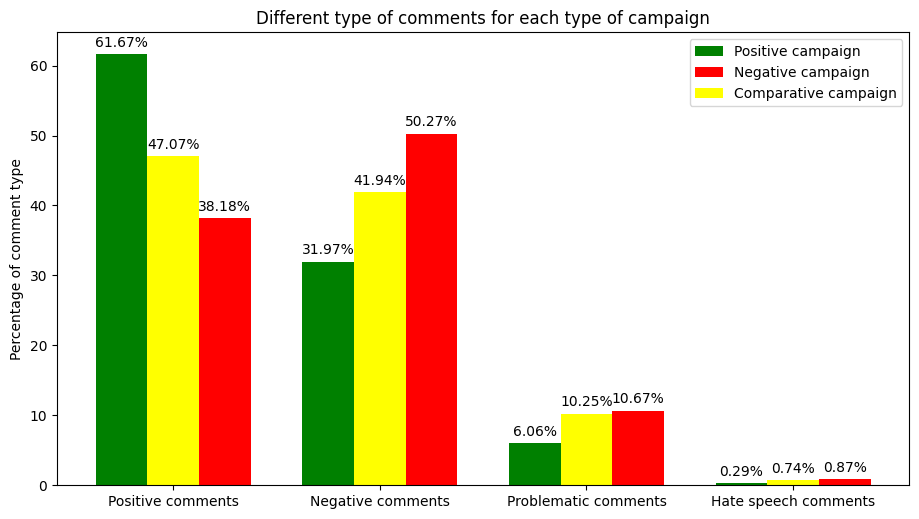

In [53]:
# The use of negative campaign: Opposition or the Government?

index=['Positive','Negative','Problematic', 'Hate Speech']

# create the new DB
a = comDB3.loc[comDB3['p_campagna3'] == 'Positive']
a = a.groupby(['c_rating']).count().reindex(index)
a = a.Count.transform(lambda x: x/x.sum()*100)

b = comDB3.loc[comDB3['p_campagna3'] == 'Negative']
b = b.groupby(['c_rating']).count().reindex(index)
b = b.Count.transform(lambda x: x/x.sum()*100)

c = comDB3.loc[comDB3['p_campagna3'] == 'Comparative']
c = c.groupby(['c_rating']).count().reindex(index)
c = c.Count.transform(lambda x: x/x.sum()*100)

# create a figure
fig, ax = plt.subplots(figsize=(11,6), dpi=100)
labels = a.index

# add legend
x = np.arange(len(labels)) 
width = 0.25  # the width of the bars
rects1 = ax.bar(x - width, a, width, label='Positive campaign', color='green',)
rects2 = ax.bar(x + width, b, width, label='Negative campaign', color='r', )
rects3 = ax.bar(x, c, width, label='Comparative campaign', color='yellow', )

autolabel_barPC(rects1)
autolabel_barPC(rects2)
autolabel_barPC(rects3)

# add labels
ax.set_ylabel('Percentage of comment type')
ax.set_title('Different type of comments for each type of campaign')
ax.set_xticks(x)
#ax.set_xticklabels(labels)
#ax.set_xlabel ('Type of comment')
ax.set_xticklabels(['Positive comments', 'Negative comments', 'Problematic comments', 'Hate speech comments'])
ax.legend()


hide_toggle()

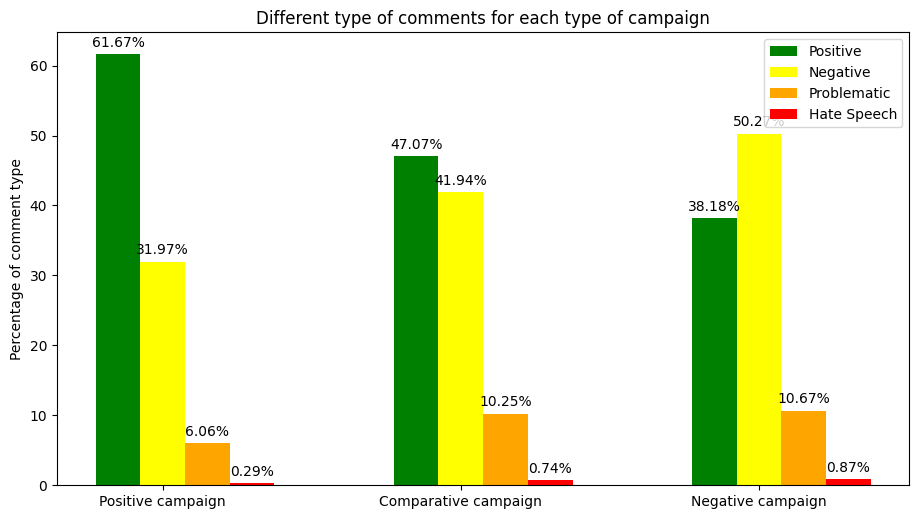

In [71]:
# The use of negative campaign: Opposition or the Government?

index=['Positive', 'Comparative','Negative' ]

# create the new DB
a = comDB3.loc[comDB3['c_rating'] == 'Positive']
a = a.groupby(['p_campagna3']).count().reindex(index)
a = a.Count.transform(lambda x: x/[29590,19381,17107]*100)

b = comDB3.loc[comDB3['c_rating'] == 'Negative']
b = b.groupby(['p_campagna3']).count().reindex(index)
b = b.Count.transform(lambda x: x/[29590,19381,17107]*100)

c = comDB3.loc[comDB3['c_rating'] == 'Problematic']
c = c.groupby(['p_campagna3']).count().reindex(index)
c = c.Count.transform(lambda x: x/[29590,19381,17107]*100)

d = comDB3.loc[comDB3['c_rating'] == 'Hate Speech']
d = d.groupby(['p_campagna3']).count().reindex(index)
d = d.Count.transform(lambda x: x/[29590,19381,17107]*100)

# create a figure
fig, ax = plt.subplots(figsize=(11,6), dpi=100)
labels = a.index

# add legend
x = np.arange(len(labels)) 
width = 0.15  # the width of the bars
rects1 = ax.bar(x - width, a, width, label='Positive', color='green',)
rects2 = ax.bar(x , b, width, label='Negative', color='yellow', )
rects3 = ax.bar(x+ width, c, width, label='Problematic', color='orange', )
rects4 = ax.bar(x+ width*2, d, width, label='Hate Speech', color='red', )

autolabel_barPC(rects1)
autolabel_barPC(rects2)
autolabel_barPC(rects3)
autolabel_barPC(rects4)

# add labels
ax.set_ylabel('Percentage of comment type')
ax.set_title('Different type of comments for each type of campaign')
ax.set_xticks(x)
#ax.set_xticklabels(labels)
#ax.set_xlabel ('Type of comment')
ax.set_xticklabels([ 'Positive campaign','Comparative campaign', 'Negative campaign',])
ax.legend()


hide_toggle()

In [59]:
comDB3.loc[comDB3['p_campagna']=='Comparative'].Count.count()

19381

### Target of campaign and hate levels

Singular or plural target?

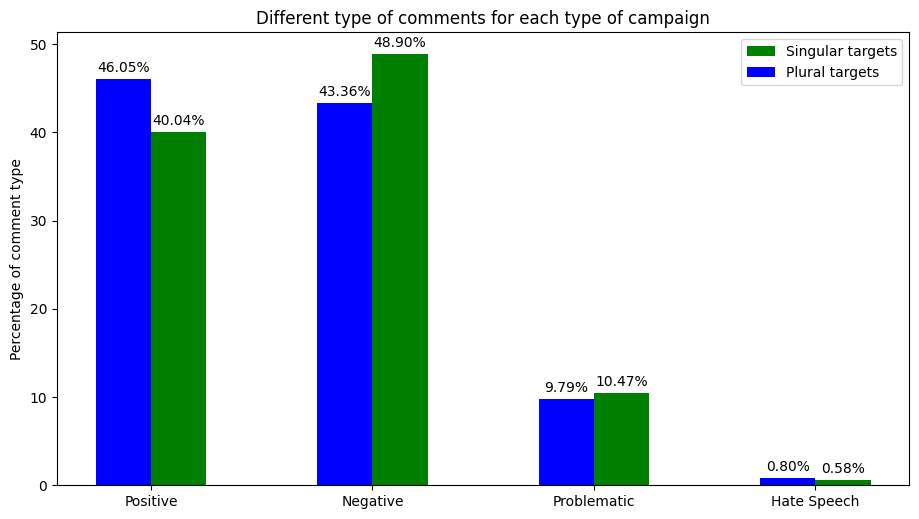

In [50]:
# The use of negative campaign: Opposition or the Government?

index=['Positive','Negative','Problematic', 'Hate Speech']

# create the new DB
a = targetDB.loc[targetDB['singplur'] == 'singolare']
a = a.groupby(['c_rating']).count().reindex(index)
a = a.Count.transform(lambda x: x/x.sum()*100)

b = targetDB.loc[targetDB['singplur'] == 'plurale']
b = b.groupby(['c_rating']).count().reindex(index)
b = b.Count.transform(lambda x: x/x.sum()*100)


# create a figure
fig, ax = plt.subplots(figsize=(11,6), dpi=100)
labels = a.index

# add legend
x = np.arange(len(labels)) 
width = 0.25  # the width of the bars
rects1 = ax.bar(x +0.125, a, width, label='Singular targets', color='green',)
rects2 = ax.bar(x -0.125, b, width, label='Plural targets', color='blue', )


autolabel_barPC(rects1)
autolabel_barPC(rects2)


# add labels
ax.set_ylabel('Percentage of comment type')
ax.set_title('Different type of comments for each type of campaign')
ax.set_xticks(x)
ax.set_xticklabels(labels)
#ax.set_xlabel ('Type of comment')
#ax.set_xticklabels(['Positive comments', 'Negative comments', 'Problematic comments', 'Hate speech comments'])
ax.legend()


hide_toggle()

Pubblic o private target?

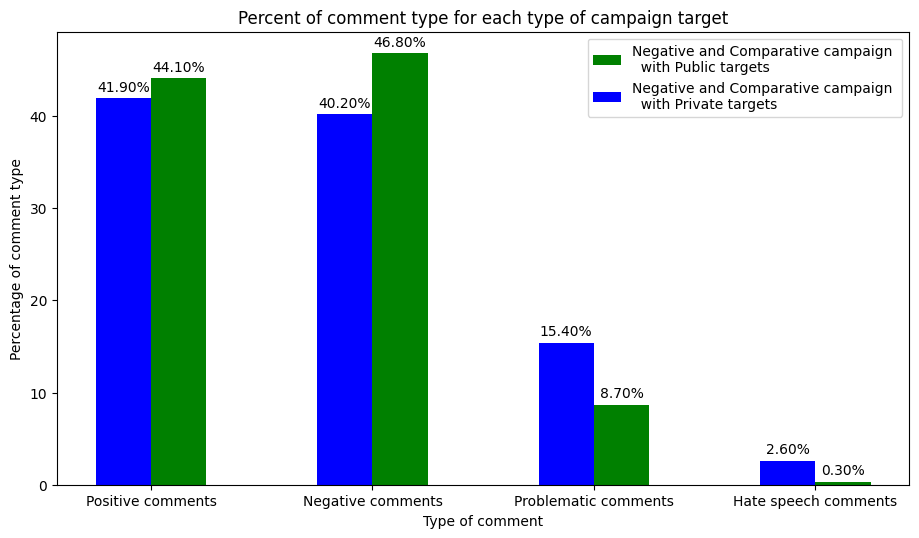

In [49]:
# The use of negative campaign: Opposition or the Government?

index=['Positive','Negative','Problematic', 'Hate Speech']

# create the new DB
a = targetDBn.loc[targetDBn['pubnonpub'] == 'pubblico_politico']
a = a.groupby(['c_rating']).count().reindex(index)
a = a.Count.transform(lambda x: x/x.sum()*100).round(1)

b = targetDBn.loc[targetDBn['pubnonpub'] == 'privato']
b = b.groupby(['c_rating']).count().reindex(index)
b = b.Count.transform(lambda x: x/x.sum()*100).round(1)


# create a figure
fig, ax = plt.subplots(figsize=(11,6), dpi=100,)
labels = a.index

# add legend
x = np.arange(len(labels)) 
width = 0.25  # the width of the bars
rects1 = ax.bar(x +0.125, a, width, label='Negative and Comparative campaign \n  with Public targets', color='green',)
rects2 = ax.bar(x -0.125, b, width, label='Negative and Comparative campaign \n  with Private targets', color='blue', )


autolabel_barPC(rects1)
autolabel_barPC(rects2)


# add labels
ax.set_ylabel('Percentage of comment type')
ax.set_title('Percent of comment type for each type of campaign target')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel ('Type of comment')
ax.set_xticklabels(['Positive comments', 'Negative comments', 'Problematic comments', 'Hate speech comments'])
ax.legend()


hide_toggle()

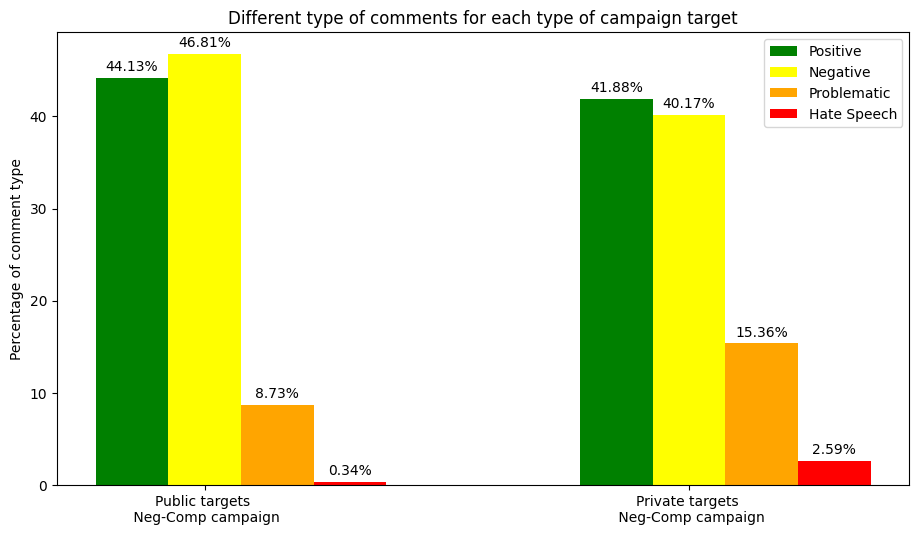

In [43]:
# The use of negative campaign: Opposition or the Government?

index=['pubblico_politico', 'privato']

# create the new DB
a = targetDBn.loc[targetDBn['c_rating'] == 'Positive']
a = a.groupby(['pubnonpub']).count().reindex(index)
a = a.Count.transform(lambda x: x/[24443,4680]*100)

b = targetDBn.loc[targetDBn['c_rating'] == 'Negative']
b = b.groupby(['pubnonpub']).count().reindex(index)
b = b.Count.transform(lambda x: x/[24443,4680]*100)

c = targetDBn.loc[targetDBn['c_rating'] == 'Problematic']
c = c.groupby(['pubnonpub']).count().reindex(index)
c = c.Count.transform(lambda x: x/[24443,4680]*100)

d = targetDBn.loc[targetDBn['c_rating'] == 'Hate Speech']
d = d.groupby(['pubnonpub']).count().reindex(index)
d = d.Count.transform(lambda x: x/[24443,4680]*100)

# create a figure
fig, ax = plt.subplots(figsize=(11,6), dpi=100)
labels = a.index

# add legend
x = np.arange(len(labels)) 
width = 0.15  # the width of the bars
rects1 = ax.bar(x - width, a, width, label='Positive', color='green',)
rects2 = ax.bar(x , b, width, label='Negative', color='yellow', )
rects3 = ax.bar(x+ width, c, width, label='Problematic', color='orange', )
rects4 = ax.bar(x+ width*2, d, width, label='Hate Speech', color='red', )

autolabel_barPC(rects1)
autolabel_barPC(rects2)
autolabel_barPC(rects3)
autolabel_barPC(rects4)

# add labels
ax.set_ylabel('Percentage of comment type')
ax.set_title('Different type of comments for each type of campaign target')
ax.set_xticks(x)
ax.set_xticklabels(labels)
#ax.set_xlabel ('Type of comment')
ax.set_xticklabels([ 'Public targets \n Neg-Comp campaign','Private targets \n Neg-Comp campaign',])
ax.legend()


hide_toggle()

In [45]:
a = targetDBn.groupby(['pubnonpub']).count()
a = a.Count
a

pubnonpub
privato               4680
pubblico_politico    24443
Name: Count, dtype: int64

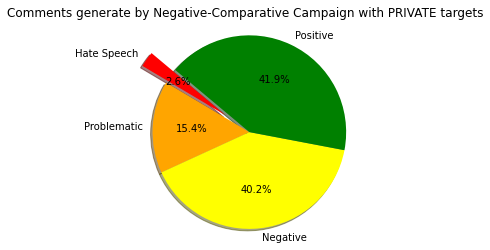

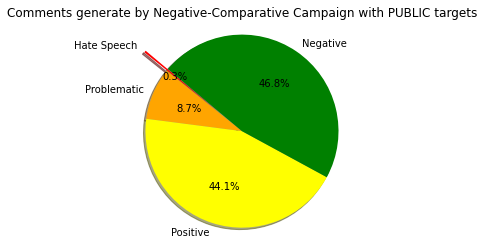

In [40]:
# PIE-CHART: type of campaign
a = targetDBn.loc[targetDBn['pubnonpub'] == 'privato']
a = a.groupby(['c_rating']).count().sort_values('Count')
a = a.Count

# labels
labels = a.index
sizes = a
colors = ['red','orange','yellow', 'green']
explode = (0.3, 0.0, 0.0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Comments generate by Negative-Comparative Campaign with PRIVATE targets')

#plt.savefig('images/tipoDiCampagnapie.png', dpi=350)

plt.show()


# PIE-CHART: type of campaign
a = targetDBn.loc[targetDBn['pubnonpub'] == 'pubblico_politico']
a = a.groupby(['c_rating']).count().sort_values('Count')
a = a.Count

# labels
labels = a.index
sizes = a
colors = ['red','orange','yellow', 'green']
explode = (0.3, 0.0, 0.0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Comments generate by Negative-Comparative Campaign with PUBLIC targets')

#plt.savefig('images/tipoDiCampagnapie.png', dpi=350)

plt.show()

hide_toggle()

Shell we consider the Nan too?

In [92]:
b = targetDB.groupby(['pubnonpub']).Count.count()
a = targetDB.groupby(['singplur']).Count.count()

print ('Test for pubnonpub',a)
print ('------------------------------')
print ('Test for singplur',b)

hide_toggle()

Test for pubnonpub singplur
Nan           6195
plurale      18024
singolare    12269
Name: Count, dtype: int64
------------------------------
Test for singplur pubnonpub
Nan                   6039
privato               5149
pubblico_politico    25300
Name: Count, dtype: int64


Testing singular vs plural AND public vs private target whit Nan values

In [83]:
# ### SINGPLUR
crosstab, test_results, expected = rp.crosstab(targetDB["c_rating"], targetDB["singplur"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               )
#print (crosstab)
print ('Results testing for sigular or plural target',test_results)
print('--------------------------------------------------')

# ### PUBNONPUB
crosstab, test_results, expected = rp.crosstab(targetDB["c_rating"], targetDB["pubnonpub"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               )
#print (crosstab)
print ('Results testing for public or privat target',test_results)

hide_toggle()

Results testing for sigular or plural target                 Chi-square test   results
0  Pearson Chi-square ( 6.0) =   184.7345
1                    p-value =     0.0000
2                 Cramer's V =     0.0503
--------------------------------------------------
Results testing for public or privat target                 Chi-square test   results
0  Pearson Chi-square ( 6.0) =   857.6526
1                    p-value =     0.0000
2                 Cramer's V =     0.1084


Testing singular vs plural AND public vs private target whitout Nan values

In [97]:
# ### SINGPLUR
crosstab, test_results, expected = rp.crosstab(targetDBn["c_rating"], targetDBn["singplur"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               )
#print (crosstab)
print ('Results testing for sigular or plural target',test_results)
print('--------------------------------------------------')

# ### PUBNONPUB
crosstab, test_results, expected = rp.crosstab(targetDBn["c_rating"], targetDBn["pubnonpub"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               )
#print (crosstab)
print ('Results testing for public or privat target',test_results)

hide_toggle()

Results testing for sigular or plural target                 Chi-square test   results
0  Pearson Chi-square ( 3.0) =   131.6212
1                    p-value =     0.0000
2                 Cramer's V =     0.0672
--------------------------------------------------
Results testing for public or privat target                 Chi-square test   results
0  Pearson Chi-square ( 3.0) =   504.0172
1                    p-value =     0.0000
2                 Cramer's V =     0.1316


In [ ]:
# The use of negative campaign: Opposition or the Government?

#index=['Hate Speech','Problematic', 'Hate Speech']

# create the new DB
a = targetDBn.loc[targetDBn['c_rating'] == 'Hate Speech']
a = a.groupby(['pubnonpub']).count()#.reindex(index)
a = a.Count.transform(lambda x: x/x.sum()*100)

b = targetDBn.loc[targetDBn['c_rating'] == 'Positive']
b = b.groupby(['pubnonpub']).count()#.reindex(index)
b = b.Count.transform(lambda x: x/x.sum()*100)

d = targetDBn.loc[targetDBn['c_rating'] == 'Negative']
d = d.groupby(['pubnonpub']).count()#.reindex(index)
d = d.Count.transform(lambda x: x/x.sum()*100)

c = targetDBn.loc[targetDBn['c_rating'] == 'Problematic']
c = c.groupby(['pubnonpub']).count()#.reindex(index)
c = c.Count.transform(lambda x: x/x.sum()*100)


# create a figure
fig, ax = plt.subplots(figsize=(11,6), dpi=100)
labels = a.index

# add legend
x = np.arange(len(labels)) 
width = 0.15  # the width of the bars
rects1 = ax.bar(x , a, width, label='Hate Speech comments', color='green',)
rects2 = ax.bar(x + width, b, width, label=' Positive comments', color='blue', )
rects3 = ax.bar(x - width, c, width, label='Problematic comments', color='yellow',)
rects4= ax.bar(x -width*2 ,d, width, label='Negative comments', color='r',)


autolabel_barPC(rects1)
autolabel_barPC(rects2)
autolabel_barPC(rects3)
autolabel_barPC(rects4)


# add labels
ax.set_ylabel('Percentage of comment type')
ax.set_title('Different type of comments for each type of campaign')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel ('Type of comment')
#x.set_xticklabels(['Positive comments', 'Negative comments', 'Problematic comments', 'Hate speech comments'])
ax.legend()


hide_toggle()

ValueError: too many values to unpack (expected 2)

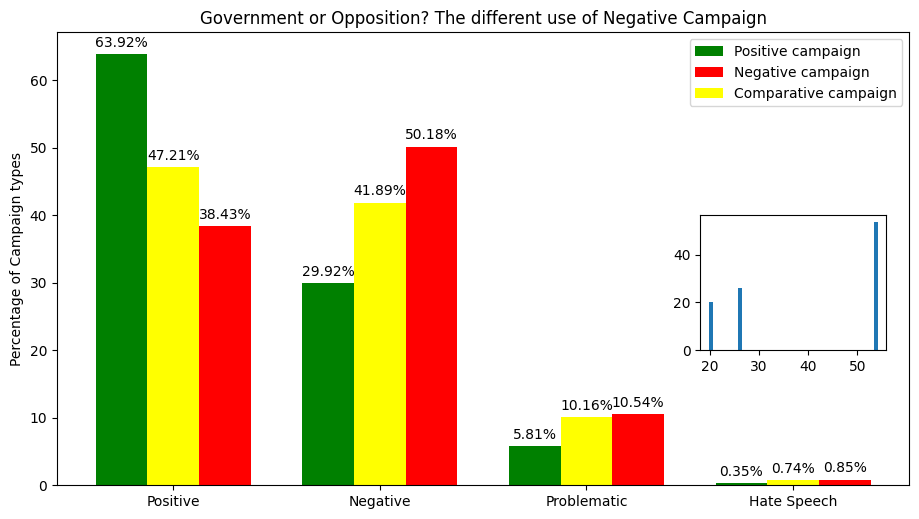

In [68]:
# The use of negative campaign: Opposition or the Government?

index=['Positive','Negative','Problematic', 'Hate Speech']

# create the new DB
a = comDB3.loc[comDB3['p_campagna3'] == 'Positive']
a = a.groupby(['c_rating']).count().reindex(index)
a = a.Count.transform(lambda x: x/x.sum()*100)

b = comDB3.loc[comDB3['p_campagna3'] == 'Negative']
b = b.groupby(['c_rating']).count().reindex(index)
b = b.Count.transform(lambda x: x/x.sum()*100)

c = comDB3.loc[comDB3['p_campagna3'] == 'Comparative']
c = c.groupby(['c_rating']).count().reindex(index)
c = c.Count.transform(lambda x: x/x.sum()*100)

# create a figure
fig, ax = plt.subplots(figsize=(11,6), dpi=100)
labels = a.index

# add legend
x = np.arange(len(labels)) 
width = 0.25  # the width of the bars
rects1 = ax.bar(x - width, a, width, label='Positive campaign', color='green',)
rects2 = ax.bar(x + width, b, width, label='Negative campaign', color='r', )
rects3 = ax.bar(x, c, width, label='Comparative campaign', color='yellow', )

autolabel_barPC(rects1)
autolabel_barPC(rects2)
autolabel_barPC(rects3)

# add labels
ax.set_ylabel('Percentage of Campaign types')
ax.set_title('Government or Opposition? The different use of Negative Campaign')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#----------------------------------------------------------

# create the zoom for hate speech


axin = ax.inset_axes([2.55, 20, 0.9, 20.0], transform = ax.transData)
axin.bar(d, d,)

# BELOW IS THE ONLY LINE THAT I CHANGED
x1, x2 = 'hatespeech'
y1, y2 = 0, 100
axin.set_xlim(x1, x2) 
axin.set_ylim(y1, y2)

axin.indicate_inset_zoom(axin)

# plot
fig.tight_layout()
#plt.savefig('images/governo.png', dpi=300)
plt.show()

print(d)

hide_toggle()

In [ ]:
d = comDB3.loc[(comDB3['p_campagna3'] == 'Positive') & (comDB3['c_rating'] == 'Hate Speech')]
#d = d.groupby(['c_rating'])
d = d.Count#.transform(lambda x: x/x.sum()*100)

axin = ax.inset_axes([2.55, 20, 0.9, 20.0], transform = ax.transData)
axin.bar(x, d, width, label='Positive campaign', color='green',)

#axin.set_xticklabels(d.index)

axin.indicate_inset_zoom(axin)

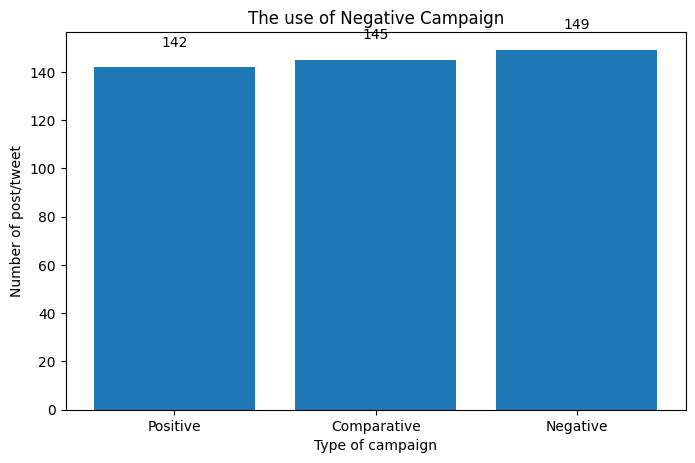

In [345]:
# BAR-CHART: Type of campaign

# variables
a = comDB3.loc[comDB3['c_rating'] == 'Hate Speech']
a = a.groupby('p_campagna3').count()
a = a.sort_values('Count')
a = a.Count

# Graphs info   
plt.figure(figsize=(8,5), dpi=100)
plt.title('The use of Negative Campaign')
plt.xlabel ('Type of campaign')
plt.ylabel ('Number of post/tweet')
width = 0.35

rects = plt.bar(a.index, height=a)

autolabel_bar1(rects)

#plt.savefig('images/tipoDiCampagna.png', dpi=350)

plt.show()

hide_toggle()

In [106]:
# https://towardsdatascience.com/hands-on-bayesian-statistics-with-python-pymc3-arviz-499db9a59501
# bayesian model

from scipy import stats
import arviz as az #pip3 install arviz
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm #pip3 install arviz
import seaborn as sns #pip3 install seaborn
import pandas as pd
from theano import shared
from sklearn import preprocessing

liwc = postDB['p_Emo_Neg'].values
idx = pd.Categorical(postDB['p_campagna'],
                     categories=['Positive', 'Neutral', 'Negative', 'Comparative']).codes
groups = len(np.unique(idx))


In [107]:
with pm.Model() as comparing_groups:
    μ = pm.Normal('μ', mu=0, sd=10, shape=groups)
    σ = pm.HalfNormal('σ', sd=10, shape=groups)

    y = pm.Normal('y', mu=μ[idx], sd=σ[idx], observed=liwc)

    trace_groups = pm.sample(5000, tune=5000)

/home/dataerror/.local/lib/python3.8/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, μ]


Sampling 2 chains for 5_000 tune and 5_000 draw iterations (10_000 + 10_000 draws total) took 53 seconds.


In [108]:
flat_fares = az.from_pymc3(trace=trace_groups)
fares_gaussian = az.summary(flat_fares)
fares_gaussian

/home/dataerror/.local/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
μ[0],1.751,0.036,1.683,1.816,0.0,0.0,17938.0,17938.0,17971.0,8000.0,1.0
μ[1],1.901,0.057,1.799,2.015,0.0,0.0,15321.0,15302.0,15363.0,7346.0,1.0
μ[2],1.195,0.055,1.093,1.298,0.0,0.0,16362.0,16362.0,16364.0,7659.0,1.0
μ[3],1.427,0.051,1.332,1.521,0.0,0.0,15914.0,15884.0,15890.0,8576.0,1.0
σ[0],2.533,0.025,2.487,2.581,0.0,0.0,18663.0,18640.0,18700.0,8152.0,1.0
σ[1],2.115,0.041,2.037,2.190,0.0,0.0,14541.0,14533.0,14538.0,7958.0,1.0
σ[2],2.251,0.039,2.177,2.324,0.0,0.0,20063.0,20011.0,20110.0,7864.0,1.0
σ[3],2.216,0.036,2.150,2.285,0.0,0.0,18768.0,18752.0,18799.0,7817.0,1.0


/home/dataerror/.local/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


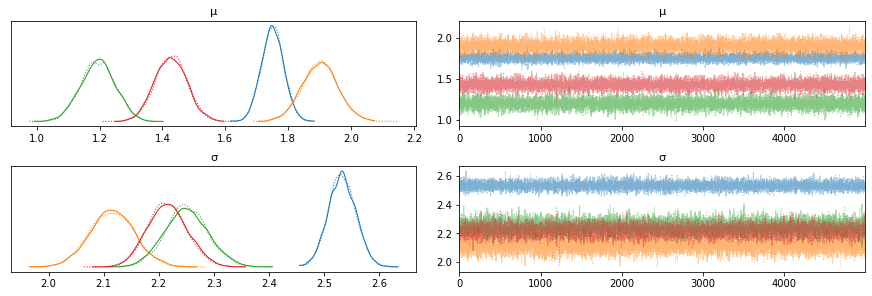

In [111]:
az.plot_trace(trace_groups);

/home/dataerror/.local/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


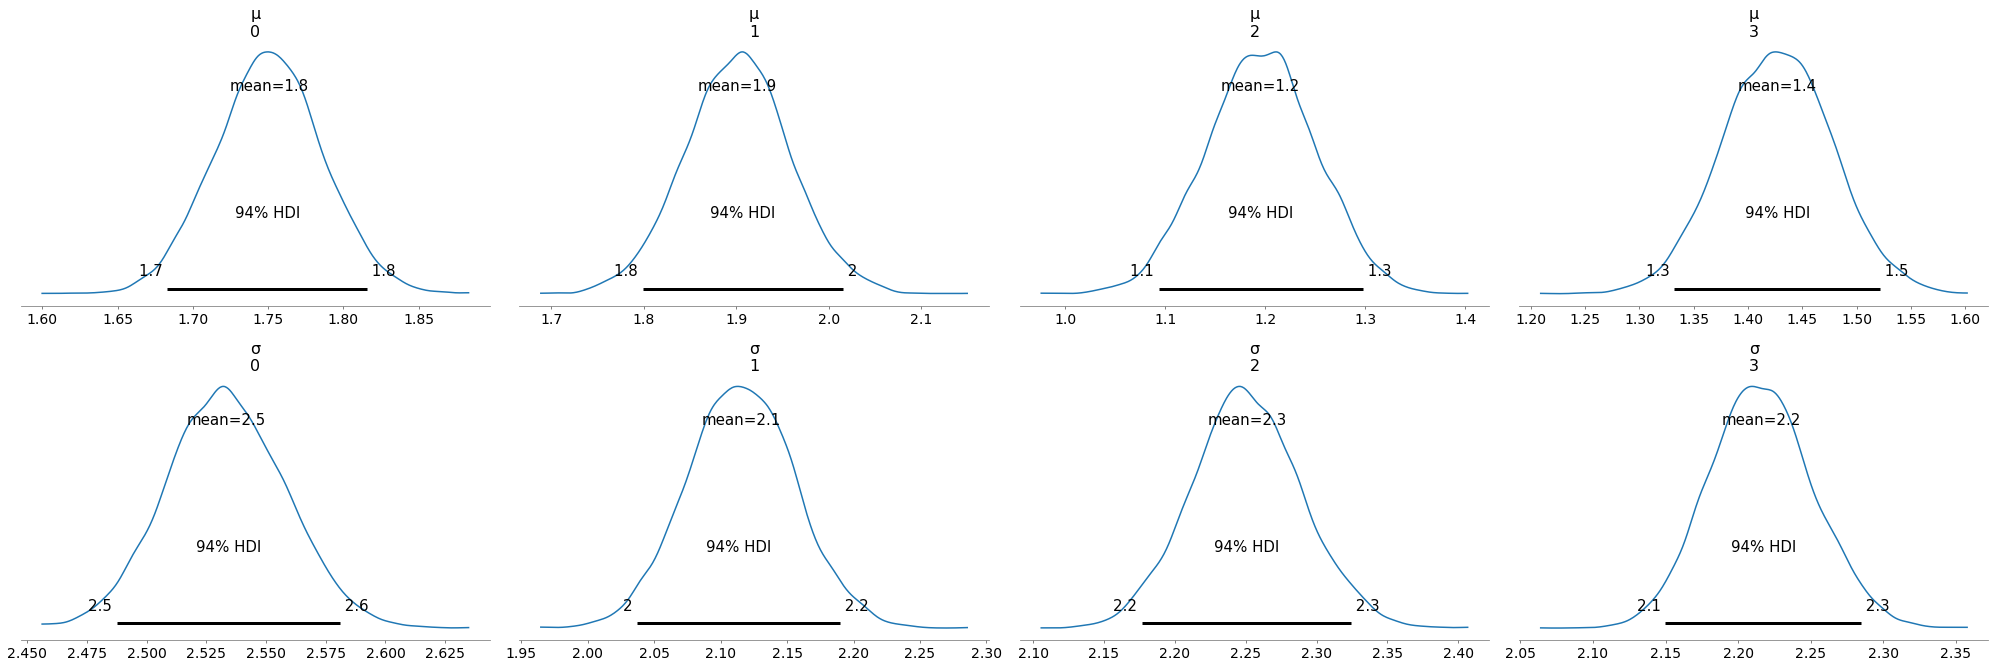

In [112]:
az.plot_posterior(trace_groups);

#Here we can interpret as such that there is 94% probability 
#the belief is between 1.7 2 1.8 for mu0.